Goal: plot results from compute_vals_HL092220

In [1]:
cd

/home/luxx0489


In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import sample
import pickle
import mne
from scipy.stats import circmean,circvar, circstd
from sklearn import decomposition
#from mne.viz import plot_evoked_topo, plot_evoked

figure_path = './jupyter_projects/MultiChannelSSSR/Figures/'


# Section 1

## Fig.0

In [3]:
figure_path = './jupyter_projects/MultiChannelSSSR/Figures/'

folder_path = "./jupyter_projects/MultiChannelSSSR/EEG_data_40_100_200Hz_HF/"


file_handle = open(folder_path +'electrode_pos.obj','rb')
pos = pickle.load(file_handle)
file_handle.close()

file_handle = open(folder_path +'/phase_topomap_all_HL041822.obj','rb')
output = pickle.load(file_handle)
file_handle.close()

ID_list = [6,7,8,9,10,12,14,16,17,18,19,20,21,22]


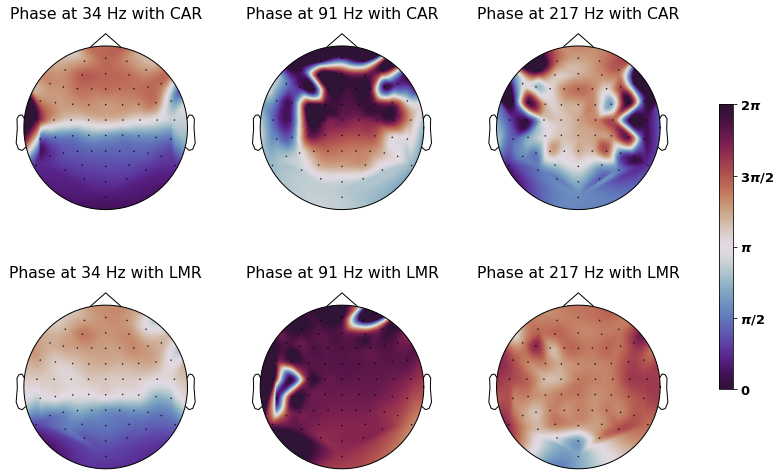

In [5]:
font = {'weight' : 'bold',
        'size'   : 13}

plt.rc('font', **font)

fig,ax = plt.subplots(2,3,figsize=(15,8))

df = pd.DataFrame(output,columns=['ID','reference','frequency']+ ['ch'+str(i+1) for i in range(64)])
df.head()

dictionary = {0:'average',1:'linked mastoid'}

df_f = df.copy().replace({'reference':dictionary})

Freq_names = ['34', '91', '217']
Ref_names = ['CAR','LMR']

for iRow in range(2):

    df_group = df_f.loc[df_f['reference'] == list(dictionary.values())[iRow]].groupby(by = ['frequency'])
    df_avg = df_group.agg(lambda x: circmean(x))

    phase_array = np.array(df_avg[['ch'+str(i+1) for i in range(64)]])

    for iCol in range(3):
        im,_ = mne.viz.plot_topomap(phase_array[iCol],pos,axes=ax[iRow,iCol],vmin=0,vmax=2*np.pi,
                                    show=False,contours=False,cmap='twilight_shifted')
        ax[iRow,iCol].set(title='Phase at '+Freq_names[iCol]+' Hz with '+Ref_names[iRow])
        
bar1 = fig.colorbar(im,ax=ax[:,:],ticks=[0, np.pi/2, np.pi, np.pi/2*3,np.pi*2],shrink=0.6)
bar1.ax.set_yticklabels(['0', r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$'])

plt.savefig(figure_path + 'Figure4.jpg', dpi=300)

## Fig.1

In [6]:
folder_path = "./jupyter_projects/MultiChannelSSSR/EEG_data_40_100_200Hz_HF"
file_handle = open(folder_path +'/absolute_PLV_and_ave_Mag_all_HL041822.obj','rb')
output = pickle.load(file_handle)
file_handle.close()

ID_list = [6,7,8,9,10,12,14,16,17,18,19,20,21,22]


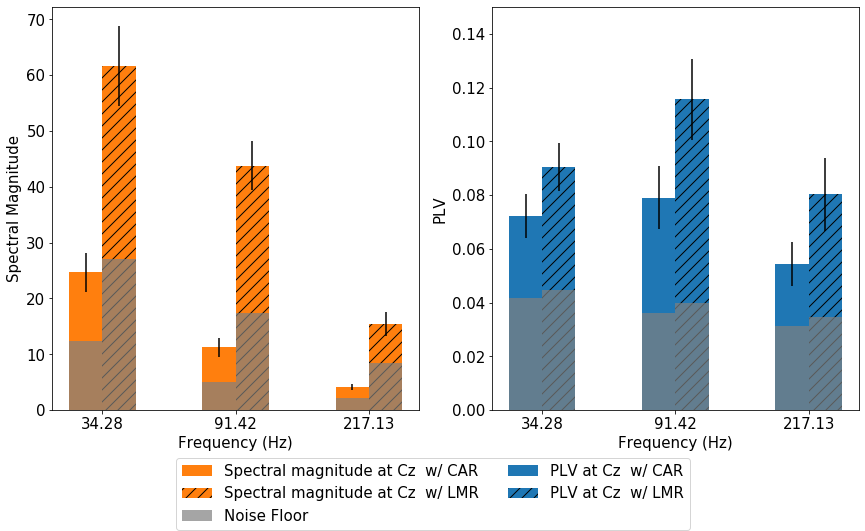

In [7]:
font = {'weight' : 'regular',
        'size'   : 15}

plt.rc('font', **font)
fig = plt.figure(figsize=(14,8))

freq_list = ['34.28', '91.42', '217.13']


df = pd.DataFrame(output[:,0:7],columns=['ID','reference','frequency']+ ['Mag_Cz','PLV_Cz'] +['Mag_Cz_noise','PLV_Cz_noise'])
df.head()

df['Mag_Cz'] = df['Mag_Cz'] *1e6
df['Mag_Cz_noise'] = df['Mag_Cz_noise'] *1e6

dictionary = {0:'average',1:'linked mastoid'}

df_f = df.copy().replace({'reference':dictionary})

df_group = df_f.loc[df_f['reference'] == 'average'].groupby(by = ['frequency'])
df_avg = df_group.mean()
df_std = df_group.std()/np.sqrt(len(ID_list))

plt.subplot(1,2,1)

wid = 1
chan_list = ['Mag_Cz']
lab_list = ['Single-channel (Cz)' ]
for i in range(1):
    x_tick = [i,i+4,i+8]
    plt.bar(x_tick,df_avg[chan_list[i]],yerr = df_std[chan_list[i]], width=wid,
           color = plt.rcParams['axes.prop_cycle'].by_key()['color'][1],
#            edgecolor = 'black',
           align='edge', label ='Spectral magnitude' + ' at Cz '+ ' w/ CAR')
    
chan_list = ['Mag_Cz_noise']
lab_list = ['Single-channel (Cz)']
for i in range(1):
    x_tick = [i,i+4,i+8]
    if i==1:
        plt.bar(x_tick,df_avg[chan_list[i]], width=wid,
               color = 'gray',
               align='edge', label ='Noise floor', alpha=0.7)
    else:
        plt.bar(x_tick,df_avg[chan_list[i]], width=wid,
               color = 'gray',
               align='edge', alpha=0.7)

        
df_group = df_f.loc[df_f['reference'] == 'linked mastoid'].groupby(by = ['frequency'])
df_avg = df_group.mean()
df_std = df_group.std()/np.sqrt(len(ID_list))

chan_list = ['Mag_Cz']
lab_list = ['Single-channel (Cz)']

for i in range(1):
    x_tick = [i+wid,i+wid+4, i+wid+8]
    plt.bar(x_tick,df_avg[chan_list[i]],yerr = df_std[chan_list[i]], width=wid,
                       color = plt.rcParams['axes.prop_cycle'].by_key()['color'][1],
#           edgecolor = 'black',
           align='edge',hatch='//', label = 'Spectral magnitude' + ' at Cz '+ ' w/ LMR')

chan_list = ['Mag_Cz_noise']
lab_list = ['Single-channel (Cz)']
for i in range(1):
    x_tick = [i+wid,i+wid+4, i+wid+8]
    plt.bar(x_tick,df_avg[chan_list[i]], width=wid,
           color = 'gray',
           align='edge', alpha=0.7, label='Noise Floor')
    
plt.xlabel('Frequency (Hz)')
plt.ylabel('Spectral Magnitude')
plt.xticks((1,5,9),labels=freq_list)


plt.subplot(1,2,2)


df_f = df.copy().replace({'reference':dictionary})

df_group = df_f.loc[df_f['reference'] == 'average'].groupby(by = ['frequency'])
df_avg = df_group.mean()
df_std = df_group.std()/np.sqrt(len(ID_list))


wid = 1
chan_list = ['PLV_Cz']
lab_list = ['Single-channel (Cz)' ]
for i in range(1):
    x_tick = [i,i+4,i+8]
    plt.bar(x_tick,df_avg[chan_list[i]],yerr = df_std[chan_list[i]], width=wid,
           color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
#            edgecolor = 'black',
           align='edge', label = 'PLV' + ' at Cz '+ ' w/ CAR')
    
chan_list = ['PLV_Cz_noise']
lab_list = ['Single-channel (Cz)']
for i in range(1):
    x_tick = [i,i+4,i+8]
    plt.bar(x_tick,df_avg[chan_list[i]], width=wid,
               color = 'gray',
               align='edge', alpha=0.7)


        
df_group = df_f.loc[df_f['reference'] == 'linked mastoid'].groupby(by = ['frequency'])
df_avg = df_group.mean()
df_std = df_group.std()/np.sqrt(len(ID_list))

chan_list = ['PLV_Cz']
lab_list = ['Single-channel (Cz)']

for i in range(1):
    x_tick = [i+wid,i+wid+4, i+wid+8]
    plt.bar(x_tick,df_avg[chan_list[i]],yerr = df_std[chan_list[i]], width=wid,
                       color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
#           edgecolor = 'black',
           align='edge', hatch='//',  label = 'PLV' + ' at Cz '+ ' w/ LMR')

chan_list = ['PLV_Cz_noise']
lab_list = ['Single-channel (Cz)']
for i in range(1):
    x_tick = [i+wid,i+wid+4, i+wid+8]
    plt.bar(x_tick,df_avg[chan_list[i]], width=wid,
           color = 'gray',
           align='edge', alpha=0.7)
    
plt.ylim(0,0.15)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PLV')
plt.xticks((1,5,9),labels=freq_list)


fig.legend(loc='lower center',borderaxespad=0.1,ncol=2)
fig.subplots_adjust(top=0.9, left=0.1, right=0.9, bottom=0.2)  # create some space below the plots by increasing the bottom-value

plt.savefig(figure_path + 'Figure1.jpg', dpi=300)

In [9]:
from scipy.stats import ttest_rel,pearsonr

freq_list = [34.28, 91.42, 217.13]
reference_list = [0,1]

print('Cz')
for iFreq in range(len(freq_list)):
    for iRef in range(len(reference_list)):
        row_index = np.logical_and(df['frequency']==freq_list[iFreq],df['reference']==reference_list[iRef])
        res = ttest_rel(df[row_index]['Mag_Cz'],df[row_index]['Mag_Cz_noise'])
        cor = pearsonr(df[row_index]['Mag_Cz'],df[row_index]['Mag_Cz_noise'])
        print(str(freq_list[iFreq])+' ' +dictionary[iRef])
        print(res)
        print(cor)

Cz
34.28 average
Ttest_relResult(statistic=4.611823658546562, pvalue=0.00048711724750700184)
(0.7771392390241517, 0.0010733373749234063)
34.28 linked mastoid
Ttest_relResult(statistic=4.4874414882354845, pvalue=0.0006111827596863231)
(0.7340403461615332, 0.002799813543924307)
91.42 average
Ttest_relResult(statistic=4.226474516585849, pvalue=0.0009895535285488475)
(0.45663015813797425, 0.10072971448832535)
91.42 linked mastoid
Ttest_relResult(statistic=6.42944190544548, pvalue=2.237431640184548e-05)
(0.20700228962162986, 0.47766160709275485)
217.13 average
Ttest_relResult(statistic=3.453063348671895, pvalue=0.004282860824621952)
(0.41564733600844106, 0.13939025527393856)
217.13 linked mastoid
Ttest_relResult(statistic=3.6402792265817214, pvalue=0.0029923743305726234)
(0.4267963761227231, 0.12802391670434704)


In [15]:
from scipy.stats import ttest_rel,pearsonr

freq_list = [34.28, 91.42, 217.13]
reference_list = [0,1]

print('Cz')
for iFreq in range(len(freq_list)):
    row_index_0 = np.logical_and(df['frequency']==freq_list[iFreq],df['reference']==reference_list[0])
    row_index_1 = np.logical_and(df['frequency']==freq_list[iFreq],df['reference']==reference_list[1])
    ratio = df[row_index_1]['Mag_Cz'].mean()/df[row_index_0]['Mag_Cz'].mean()
    print(str(freq_list[iFreq])+' ' +dictionary[iRef])
    print(ratio)

Cz
34.28 linked mastoid
2.7279100263360383
91.42 linked mastoid
3.877871896771382
217.13 linked mastoid
3.775304013817514


## Fig.2

In [8]:
folder_path = "./jupyter_projects/MultiChannelSSSR/EEG_data_40_100_200Hz_HF"
file_handle = open(folder_path +'/Fig23_location_PLV_all_HL041822.obj','rb')
output = pickle.load(file_handle)
file_handle.close()

ID_list = [6,7,8,9,10,12,14,16,17,18,19,20,21,22]


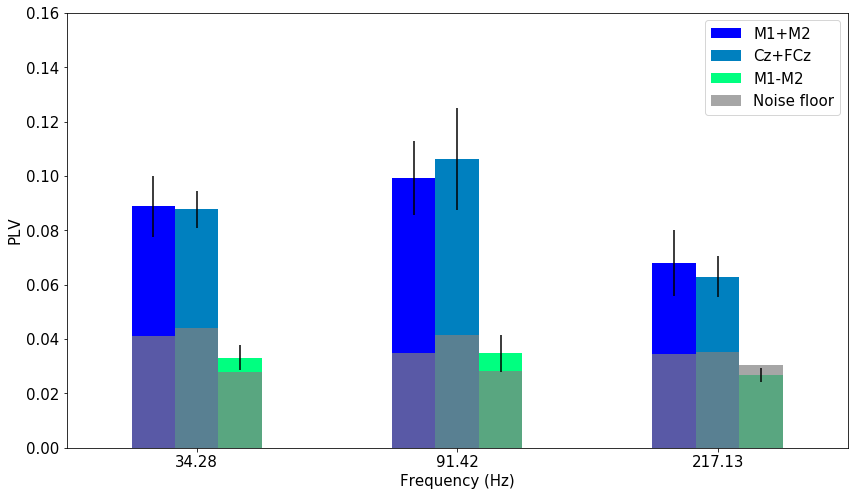

In [9]:
font = {'weight' : 'regular',
        'size'   : 15}

plt.rc('font', **font)

#fig = plt.figure(figsize=(14,8))

Freq_set = {34.28, 91.42, 217.13}

label = [output[iE,1] in Freq_set for iE in range(output.shape[0])]
df = pd.DataFrame(output[label,:],columns=['ID','frequency(Hz)']+ ['M1+M2','M1-M2','Cz+FCz'] + 
                  ['M1+M2_phase','M1-M2_phase','Cz+FCz_phase'] + ['M1+M2_noise','M1-M2_noise','Cz+FCz_noise'])
df.head()

df_f = df
df_group = df_f.groupby(by=['frequency(Hz)'])
df_avg = df_group.mean()
df_std = df_group.std()/np.sqrt(len(ID_list))
df_avg.drop(columns='ID')
ax = df_avg[['M1+M2','Cz+FCz','M1-M2']].plot(kind='bar',yerr=df_std,ylim=(0,0.16),rot=0, figsize=(14,8), cmap='winter')
ax.set_ylabel('PLV')

df_avg[['M1+M2_noise','Cz+FCz_noise','M1-M2_noise']].plot(kind='bar',ylim=(0,0.16),rot=0, figsize=(14,8),ax=ax, color='gray', alpha=0.7, legend=False)

ax.legend(['M1+M2','Cz+FCz','M1-M2','Noise floor'])

ax.set_xlabel('Frequency (Hz)')

plt.savefig(figure_path + 'Figure2.jpg', dpi=300)

In [ ]:
from scipy.stats import ttest_rel

freq_list = [34.28, 91.42, 217.13]
reference_list = [0,1]

print('M1+M2')
for iFreq in range(len(freq_list)):
    row_index = df['frequency(Hz)']==freq_list[iFreq]
    res = ttest_rel(df[row_index]['M1+M2'],df[row_index]['M1+M2_noise'])
    print(str(freq_list[iFreq])+' ' +dictionary[iRef])
    print(res)

In [ ]:
from scipy.stats import ttest_rel

freq_list = [34.28, 91.42, 217.13]
reference_list = [0,1]

print('M1-M2')
for iFreq in range(len(freq_list)):
    row_index = df['frequency(Hz)']==freq_list[iFreq]
    res = ttest_rel(df[row_index]['M1-M2'],df[row_index]['M1-M2_noise'])
    print(str(freq_list[iFreq])+' ' +dictionary[iRef])
    print(res)

In [ ]:
from scipy.stats import ttest_rel

freq_list = [34.28, 91.42, 217.13]
reference_list = [0,1]

print('Cz+FCz')
for iFreq in range(len(freq_list)):
    row_index = df['frequency(Hz)']==freq_list[iFreq]
    res = ttest_rel(df[row_index]['Cz+FCz'],df[row_index]['Cz+FCz_noise'])
    print(str(freq_list[iFreq])+' ' +dictionary[iRef])
    print(res)

In [23]:
folder_path = "./jupyter_projects/MultiChannelSSSR/EEG_data_40_100_200Hz_HF"
file_handle = open(folder_path +'/Fig23_location_mag_all.obj','rb')
output = pickle.load(file_handle)
file_handle.close()

ID_list = [6,7,8,9,10,12,14,16,17,18,19,20,21,22]


## Fig.3

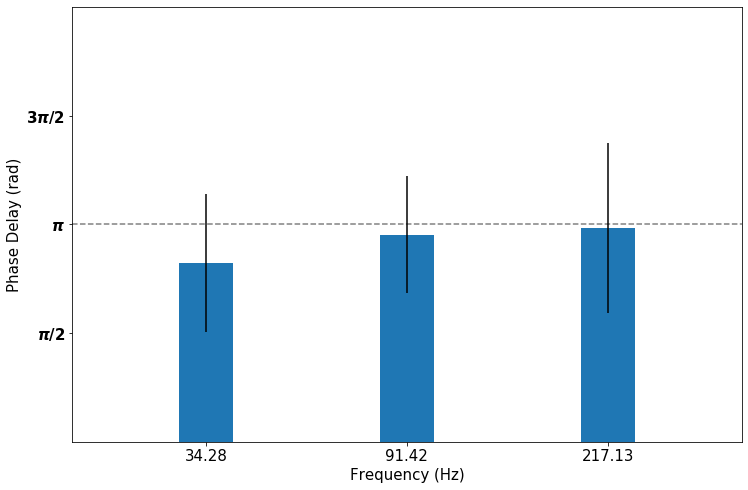

In [10]:
font = {'weight' : 'regular',
        'size'   : 15}

plt.rc('font', **font)

plt.figure(figsize=(12,8))

Freq_list = [34.28, 91.42, 217.13]


ind = output[:,1] == Freq_list[0]
y1 = circmean(output[ind,5]-output[ind,7],np.pi*2,0)
e1 = circstd(output[ind,5]-output[ind,7],np.pi*2,0)
ind = output[:,1] == Freq_list[1]
y2 = circmean(output[ind,5]-output[ind,7],np.pi*2,0)
e2 = circstd(output[ind,5]-output[ind,7],np.pi*2,0)
ind = output[:,1] == Freq_list[2]
y3 = circmean(output[ind,5]-output[ind,7],np.pi*2,0)
e3 = circstd(output[ind,5]-output[ind,7],np.pi*2,0)


plt.bar([2,5,8],[y1,y2,y3],yerr=[e1,e2,e3])
plt.xticks([2,5,8],[str(iE) for iE in Freq_list])
plt.yticks([np.pi/2,np.pi,np.pi/2*3],[r'$\pi /2$',r'$\pi$',r'$3\pi/2$'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase Delay (rad)')
plt.axhline(y=np.pi,color='k',alpha=0.5, linestyle='--')
plt.xlim(0,10)
plt.ylim(0,np.pi*2)

plt.savefig(figure_path + 'Figure3.jpg', dpi=300)

## Fig.4

In [11]:
folder_path = "./jupyter_projects/MultiChannelSSSR/EEG_data_40_100_200Hz_HF"
file_handle = open(folder_path +'/method_comparison_all_HL041822.obj','rb')
output = pickle.load(file_handle)
file_handle.close()

ID_list = [6,7,8,9,10,12,14,16,17,18,19,20,21,22]


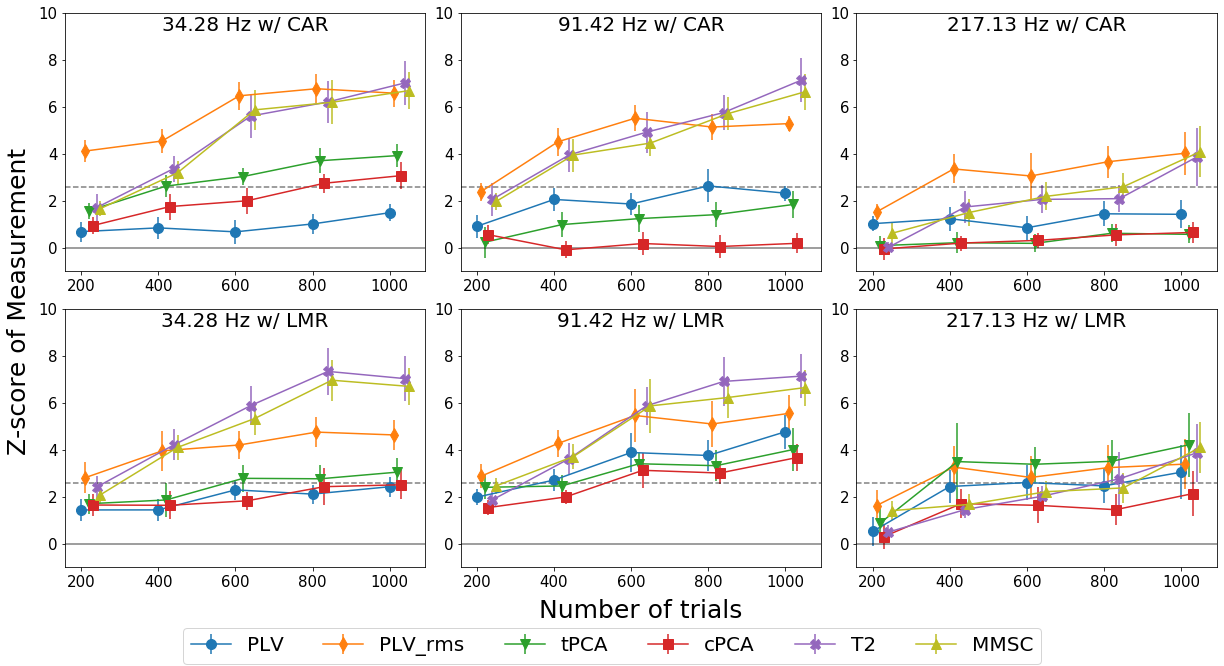

In [12]:
font = {'weight' : 'regular',
        'size'   : 15}

plt.rc('font', **font)

df = pd.DataFrame(output[:,:],columns=['ID','reference','frequency','sample size']+
                  ['PLV','ITC','PLV_Cz','ITC_Cz','plv_mean','itc_mean','plv_rms','itc_rms','T2','cpca','tpca','msmc'])

dictionary = {0:'average',1:'linked mastoid'}
fig = plt.figure(figsize=(20,10))
Freq_list = [34.28,91.42,217.13]
Ref_list = ['CAR','LMR']
method_list = ['PLV_Cz','plv_rms','tpca','cpca','T2','msmc']
method_name_list =  ['PLV','PLV_rms','tPCA','cPCA','T2','MMSC']

markers = ["o","d", "v", "s", "X", "^"]

for iFreq in range(3):
    
    for iRef in range(2):
        
        ax = plt.subplot(2,3,iFreq+iRef*3+1)
        df_f = df.copy()[(df['frequency']== Freq_list[iFreq]) & (df['reference']==iRef)].replace({'reference':dictionary})

        df_group = df_f.groupby(by=['frequency','reference','sample size'])
        df_avg = df_group.mean()
        df_std = df_group.std()/np.sqrt(len(ID_list))
        df_avg.drop(columns='ID')

        
        plt.axhline(y=2.58,color='k',alpha=0.5,linestyle='--')
        plt.axhline(y=0, color='k', alpha=0.5)
        

        for i in range(len(method_list)):
            x_tick = np.linspace(200,1000,5)
            if i<5:
                plt.errorbar(x_tick+i*10,df_avg[method_list[i]],yerr = df_std[method_list[i]], marker=markers[i], markersize=10,
                   color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i], label=method_name_list[i])
            else:
                plt.errorbar(x_tick+i*10,df_avg[method_list[i]],yerr = df_std[method_list[i]], marker=markers[i],markersize=10,
                   color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i+3], label=method_name_list[i])
        
       # plt.xlabel('Number of trials')    
       # plt.title(str(Freq_list[iFreq]) +' Hz w/ '+Ref_list[iRef])
        plt.text(.5,.93,str(Freq_list[iFreq]) +' Hz w/ '+Ref_list[iRef],
        horizontalalignment='center',
        transform=ax.transAxes, fontsize=20)
        plt.ylim(-1,10)
      #  plt.ylabel('Z-score of Measurement')
        
        if iFreq==0 and iRef==0:
            fig.legend(loc='lower center',borderaxespad=0.1,ncol=6, fontsize=20)

plt.tight_layout()
    
fig.subplots_adjust(top=0.9, left=0.1, right=0.9, bottom=0.13)  # create some space below the plots by increasing the bottom-value

fig.text(0.5, 0.06, 'Number of trials', ha='center', fontsize=25)
fig.text(0.06, 0.5, 'Z-score of Measurement', va='center', rotation='vertical', fontsize=25)

plt.savefig(figure_path + 'Figure5.jpg', dpi=300)

# Fig. 5

We are adding this figure to address the comments requesting the abs values

In [15]:
folder_path = "./jupyter_projects/MultiChannelSSSR/EEG_data_40_100_200Hz_HF"
file_handle = open(folder_path +'/method_comparison_all_abs_w_std_HL041822.obj','rb')
output = pickle.load(file_handle)
output_noise = pickle.load(file_handle)
output_noise_std = pickle.load(file_handle)
file_handle.close()

ID_list = [6,7,8,9,10,12,14,16,17,18,19,20,21,22]


In [26]:
df = pd.DataFrame(output[:,:],columns=['ID','reference','frequency','sample size']+
                  ['PLV','ITC','PLV_Cz','ITC_Cz','plv_mean','itc_mean','plv_rms','itc_rms','T2','cpca','tpca','msmc'])

df_noise = pd.DataFrame(output_noise[:,:],columns=['ID','reference','frequency','sample size']+
                  ['PLV','ITC','PLV_Cz','ITC_Cz','plv_mean','itc_mean','plv_rms','itc_rms','T2','cpca','tpca','msmc'])

df_noise_std = pd.DataFrame(output_noise_std[:,:],columns=['ID','reference','frequency','sample size']+
                  ['PLV','ITC','PLV_Cz','ITC_Cz','plv_mean','itc_mean','plv_rms','itc_rms','T2','cpca','tpca','msmc'])


In [17]:

dictionary = {0:'average',1:'linked mastoid'}
fig = plt.figure(figsize=(20,10))
Freq_list = [34.28,91.42,217.13]
Ref_list = ['CAR','LMR']
method_list = ['PLV_Cz','plv_rms','tpca','cpca','T2','msmc']
method_name_list =  ['PLV','PLV_rms','tPCA','cPCA','T2','MMSC']
markers = ["o","d", "v", "s", "X", "^"]



<Figure size 1440x720 with 0 Axes>

/home/luxx0489/.conda/envs/mne/lib/python3.7/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/luxx0489/.conda/envs/mne/lib/python3.7/site-packages/ipykernel_launcher.py:62: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/luxx0489/.conda/envs/mne/lib/python3.7/site-packages/ipykernel_launcher.py:67: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes 

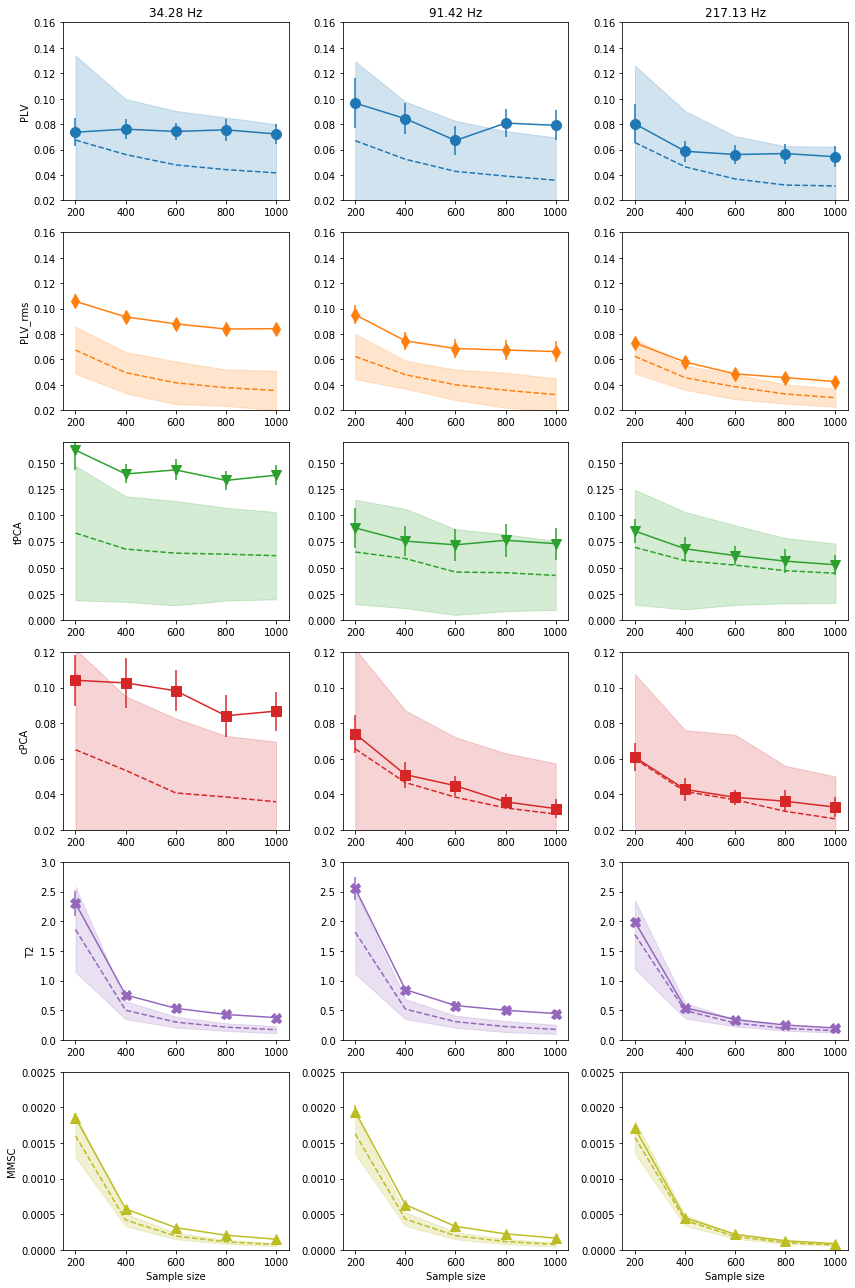

In [31]:
y_lim_list = [[0.02, 0.16], [0.02, 0.16], [0, 0.17], [0.02, 0.12],[0, 3], [0,0.0025]]

z = 1.96
plt.figure(figsize=(12,18))

for iFreq in range(3):

    iRef = 0

    df_f = df.copy()[(df['frequency']== Freq_list[iFreq]) & (df['reference']==iRef)].replace({'reference':dictionary})

    df_group = df_f.groupby(by=['frequency','reference','sample size'])
    df_avg = df_group.mean()
    df_std = df_group.std()/np.sqrt(len(ID_list))
    df_avg.drop(columns='ID')

    df_noise_f = df_noise.copy()[(df['frequency']== Freq_list[iFreq]) & (df['reference']==iRef)].replace({'reference':dictionary})

    df_noise_group = df_noise_f.groupby(by=['frequency','reference','sample size'])
    df_noise_avg = df_noise_group.mean()
    df_noise_avg.drop(columns='ID')

    df_noise_std_f = df_noise_std.copy()[(df['frequency']== Freq_list[iFreq]) & (df['reference']==iRef)].replace({'reference':dictionary})
    
    df_noise_std_group = df_noise_std_f.groupby(by=['frequency','reference','sample size'])
    df_noise_std_avg = df_noise_std_group.mean()

    for i in range(len(method_list)):
        plt.subplot(6, 3, 3*i+1 + iFreq)
        x_tick = np.linspace(200,1000,5)
        if i<5:
            plt.errorbar(x_tick,df_avg[method_list[i]],yerr = df_std[method_list[i]], marker=markers[i], markersize=10,
               color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i], label=method_name_list[i])
        else:
            plt.errorbar(x_tick,df_avg[method_list[i]],yerr = df_std[method_list[i]], marker=markers[i],markersize=10,
               color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i+3], label=method_name_list[i])
        

    for i in range(len(method_list)):
        plt.subplot(6, 3, 3*i+1 + iFreq)
        x_tick = np.linspace(200,1000,5)
        if i<5:
            plt.errorbar(x_tick,df_noise_avg[method_list[i]],
               color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i], label=method_name_list[i], linestyle='--')
            
            plt.fill_between(x_tick, df_noise_avg[method_list[i]] + df_noise_std_avg[method_list[i]]*z,
                             df_noise_avg[method_list[i]] - df_noise_std_avg[method_list[i]] *z,
                            color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i], alpha=0.2)
        else:
            plt.errorbar(x_tick,df_noise_avg[method_list[i]],
               color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i+3], label=method_name_list[i], linestyle='--')
            plt.fill_between(x_tick, df_noise_avg[method_list[i]] + df_noise_std_avg[method_list[i]]*z,
                             df_noise_avg[method_list[i]] - df_noise_std_avg[method_list[i]] *z,
                            color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i+3], alpha=0.2)
        
            
        plt.xlim(150, 1050)
        plt.ylim(y_lim_list[i])
    

for iMethod in range(len(method_name_list)):
    plt.subplot(6,3, 1+ iMethod*3)
    
    plt.ylabel(method_name_list[iMethod])
    
for iFrequency in range(len(Freq_list)):
    plt.subplot(6, 3, 1+iFrequency)
    plt.title(str(Freq_list[iFrequency])+' Hz')
    
    plt.subplot(6,3, 1+iFrequency+5*3)
    plt.xlabel('Sample size')
    
plt.tight_layout()

/home/luxx0489/.conda/envs/mne/lib/python3.7/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/luxx0489/.conda/envs/mne/lib/python3.7/site-packages/ipykernel_launcher.py:62: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/luxx0489/.conda/envs/mne/lib/python3.7/site-packages/ipykernel_launcher.py:67: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes 

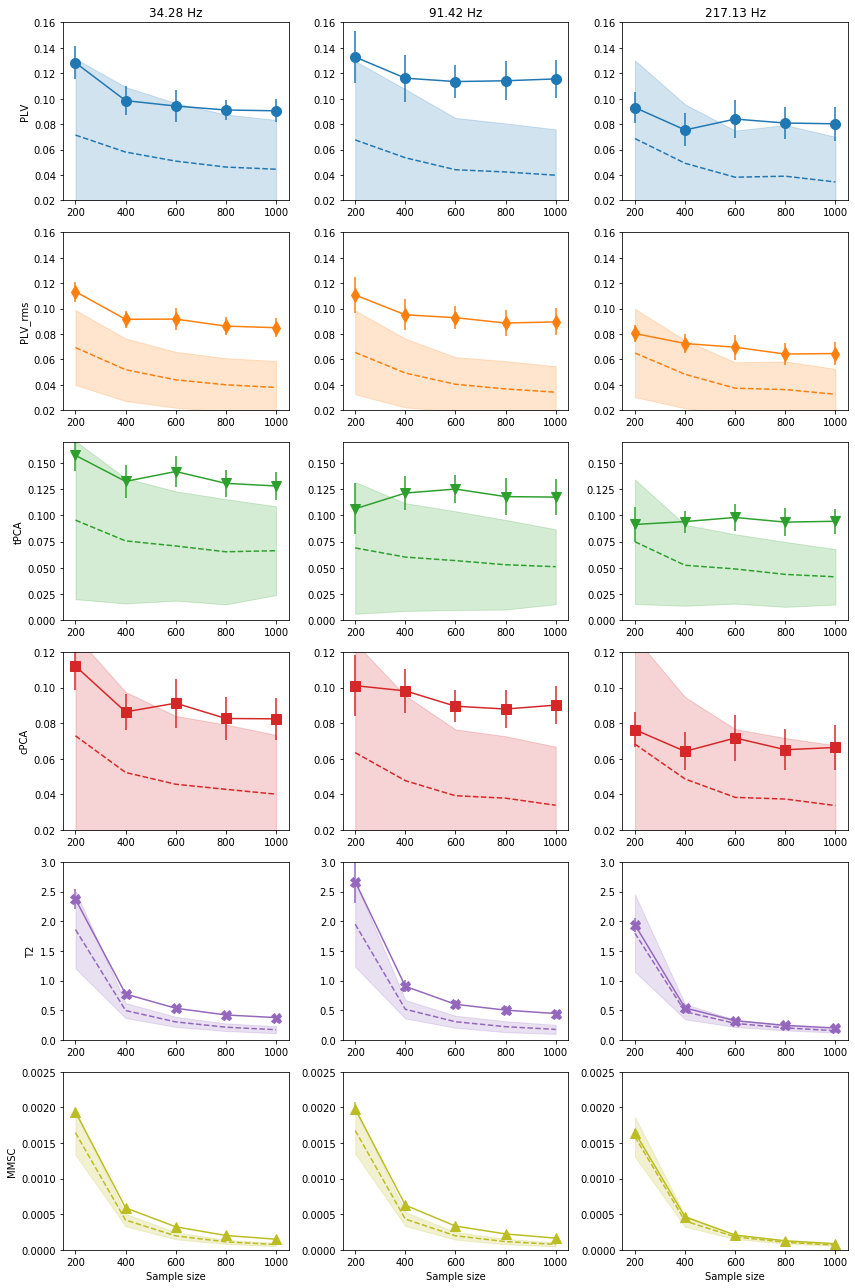

In [32]:
y_lim_list = [[0.02, 0.16], [0.02, 0.16], [0, 0.17], [0.02, 0.12],[0, 3], [0,0.0025]]

z = 1.96
plt.figure(figsize=(12,18))

for iFreq in range(3):

    iRef = 1

    df_f = df.copy()[(df['frequency']== Freq_list[iFreq]) & (df['reference']==iRef)].replace({'reference':dictionary})

    df_group = df_f.groupby(by=['frequency','reference','sample size'])
    df_avg = df_group.mean()
    df_std = df_group.std()/np.sqrt(len(ID_list))
    df_avg.drop(columns='ID')

    df_noise_f = df_noise.copy()[(df['frequency']== Freq_list[iFreq]) & (df['reference']==iRef)].replace({'reference':dictionary})

    df_noise_group = df_noise_f.groupby(by=['frequency','reference','sample size'])
    df_noise_avg = df_noise_group.mean()
    df_noise_avg.drop(columns='ID')

    df_noise_std_f = df_noise_std.copy()[(df['frequency']== Freq_list[iFreq]) & (df['reference']==iRef)].replace({'reference':dictionary})
    
    df_noise_std_group = df_noise_std_f.groupby(by=['frequency','reference','sample size'])
    df_noise_std_avg = df_noise_std_group.mean()

    for i in range(len(method_list)):
        plt.subplot(6, 3, 3*i+1 + iFreq)
        x_tick = np.linspace(200,1000,5)
        if i<5:
            plt.errorbar(x_tick,df_avg[method_list[i]],yerr = df_std[method_list[i]], marker=markers[i], markersize=10,
               color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i], label=method_name_list[i])
        else:
            plt.errorbar(x_tick,df_avg[method_list[i]],yerr = df_std[method_list[i]], marker=markers[i],markersize=10,
               color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i+3], label=method_name_list[i])
        

    for i in range(len(method_list)):
        plt.subplot(6, 3, 3*i+1 + iFreq)
        x_tick = np.linspace(200,1000,5)
        if i<5:
            plt.errorbar(x_tick,df_noise_avg[method_list[i]],
               color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i], label=method_name_list[i], linestyle='--')
            
            plt.fill_between(x_tick, df_noise_avg[method_list[i]] + df_noise_std_avg[method_list[i]]*z,
                             df_noise_avg[method_list[i]] - df_noise_std_avg[method_list[i]] *z,
                            color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i], alpha=0.2)
        else:
            plt.errorbar(x_tick,df_noise_avg[method_list[i]],
               color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i+3], label=method_name_list[i], linestyle='--')
            plt.fill_between(x_tick, df_noise_avg[method_list[i]] + df_noise_std_avg[method_list[i]]*z,
                             df_noise_avg[method_list[i]] - df_noise_std_avg[method_list[i]] *z,
                            color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i+3], alpha=0.2)
        
            
        plt.xlim(150, 1050)
        plt.ylim(y_lim_list[i])
    

for iMethod in range(len(method_name_list)):
    plt.subplot(6,3, 1+ iMethod*3)
    
    plt.ylabel(method_name_list[iMethod])
    
for iFrequency in range(len(Freq_list)):
    plt.subplot(6, 3, 1+iFrequency)
    plt.title(str(Freq_list[iFrequency])+' Hz')
    
    plt.subplot(6,3, 1+iFrequency+5*3)
    plt.xlabel('Sample size')
    
plt.tight_layout()